In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [16]:
#Read Data
df = pd.read_csv('2019-fish-data.csv')
df = df.dropna()
df

,Fish,Live weight of landings (t),Value (£1000s),Price (£/tonne),Month
0,Bass,49,444,"9,122",11
1,Cod,763,"2,378","3,117",11
2,Haddock,"1,532","1,894","1,236",11
3,Hake,370,"1,278","3,450",11
4,Plaice,243,510,"2,100",11
...,...,...,...,...,...
67,Cod,629,"1,924","3,061",0
68,Haddock,"1,843","2,426","1,316",0
69,Plaice,175,228,"1,300",0
70,Pollack (Lythe),129,291,"2,258",0


In [17]:
def line_plot_per_fish(title:str,ylabel:str,column_name:str) -> None:
    """
    plots a line of monthly data with data provided in the column *column_name*
    """
    sns.set_theme(style='darkgrid')
    fish_set = set(df['Fish'])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Month')
    for fish in fish_set:
        sub_df = df.loc[df['Fish'] == fish].sort_values('Month')
        dat = sub_df[column_name].apply(
            lambda x: x.replace(',','')).to_numpy(dtype=float)
        plt.plot(dat,label=fish)
    plt.legend(loc='upper left')
    plt.show()


In [18]:
def cum_freq_per_fish(title: str, ylabel: str, column_name: str) -> None:
    """
    plots a line of cumulative monthly data with data provided in the column *column_name*
    """
    sns.set_theme(style='darkgrid')
    fish_set = set(df['Fish'])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Month')
    for fish in fish_set:
        sub_df = df.loc[df['Fish'] == fish].sort_values('Month')
        dat = sub_df[column_name].apply(
            lambda x: x.replace(',', '')).to_numpy(dtype=float)
        cum_dat = np.cumsum(dat)   
        plt.plot(cum_dat, label=fish)
    plt.legend(loc='upper left')
    plt.show()


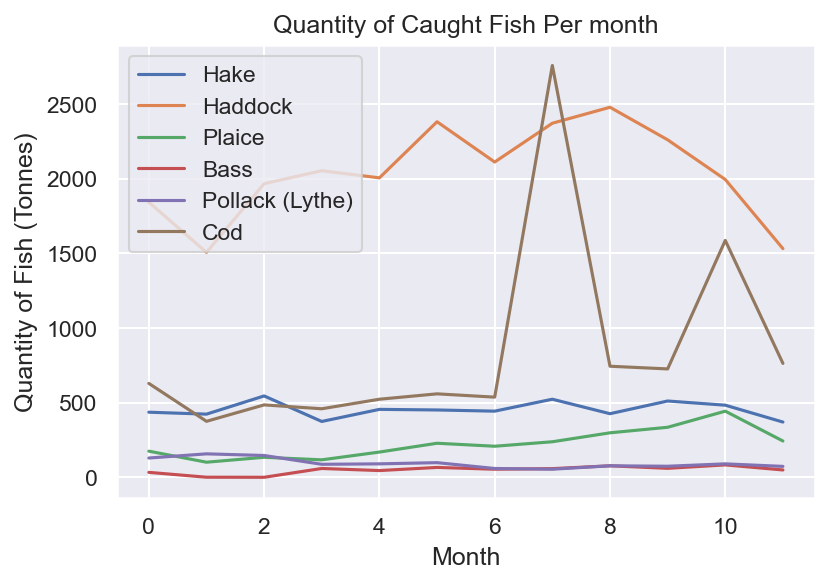

In [19]:
line_plot_per_fish('Quantity of Caught Fish Per month','Quantity of Fish (Tonnes)','Live weight of landings (t)')

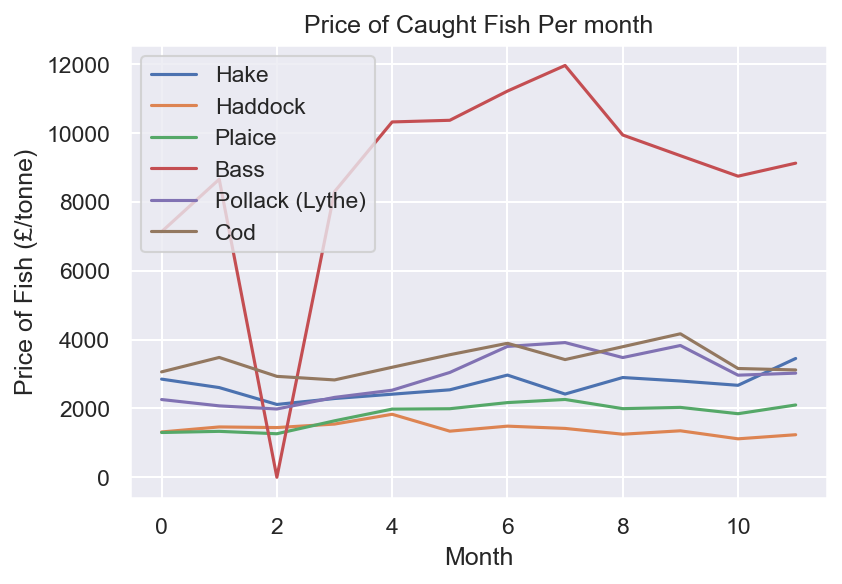

In [20]:
line_plot_per_fish('Price of Caught Fish Per month','Price of Fish (£/tonne)','Price (£/tonne)')

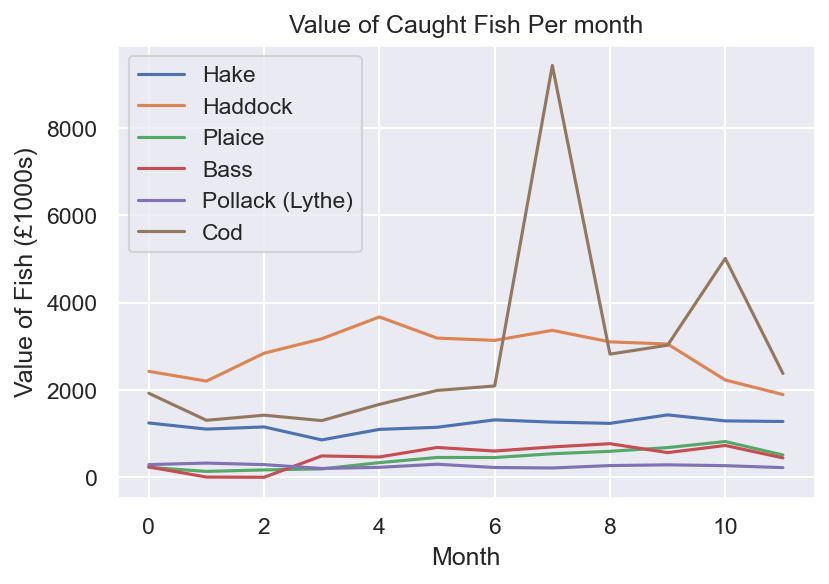

In [21]:
line_plot_per_fish('Value of Caught Fish Per month',
                   'Value of Fish (£1000s)', 'Value (£1000s)')


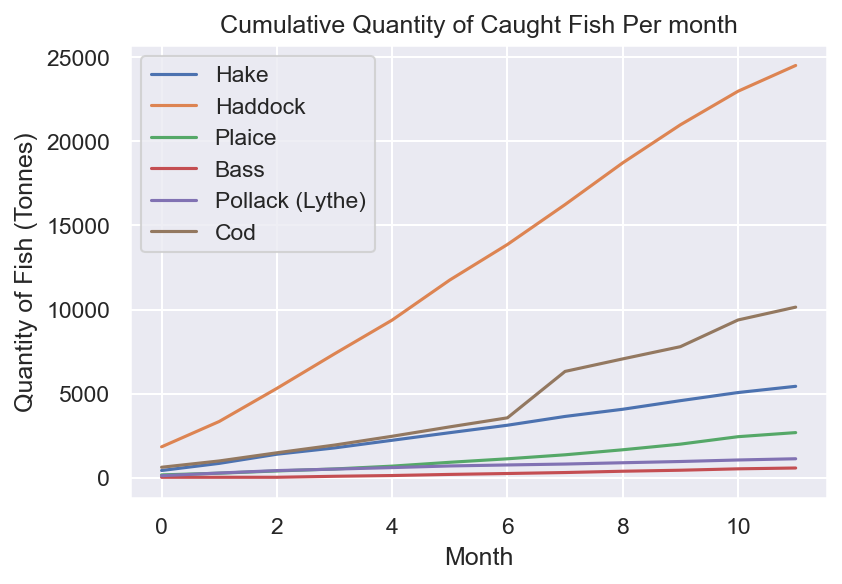

In [22]:
cum_freq_per_fish('Cumulative Quantity of Caught Fish Per month','Quantity of Fish (Tonnes)','Live weight of landings (t)')

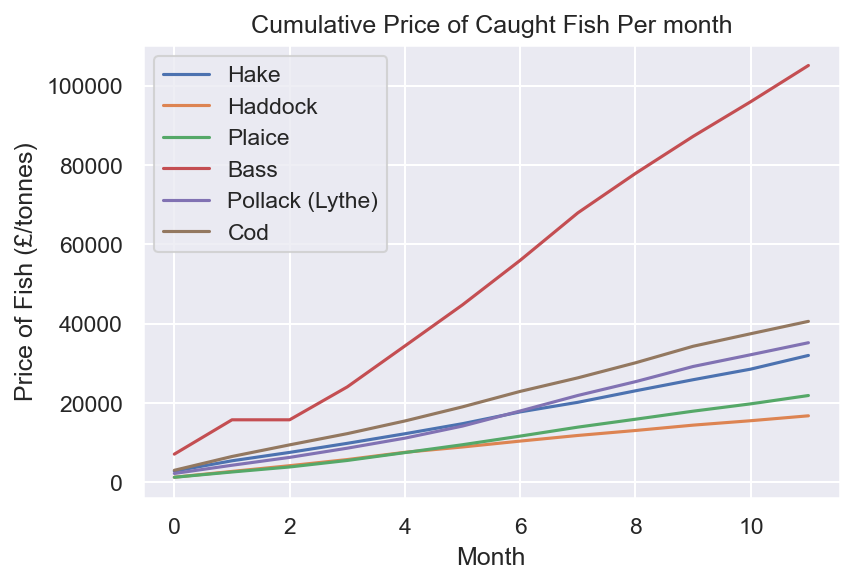

In [23]:
cum_freq_per_fish('Cumulative Price of Caught Fish Per month',
                  'Price of Fish (£/tonnes)', 'Price (£/tonne)')


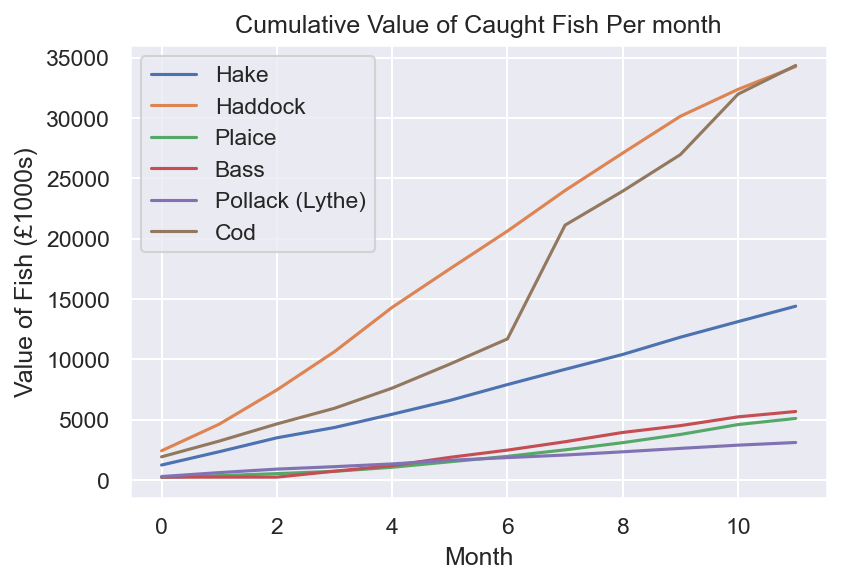

In [24]:
cum_freq_per_fish('Cumulative Value of Caught Fish Per month',
                   'Value of Fish (£1000s)', 'Value (£1000s)')
